# Syntax Analysis Across Languages

The goal of this analysis is to observe the similarities betweeen languages, and mostly the differences. 

In linguistics, syntax (/ˈsɪntæks/) is the set of rules, principles, and processes that govern the structure of sentences (sentence structure) in a given language, usually including **word order**. The term syntax is also used to refer to the study of such principles and processes. The goal of many syntacticians is to discover the syntactic rules common to all languages. (Wikipedia Souce)


This analysis is focused on word order across:
- English
- French 
- German


For that the children's book "The Little Prince" from 'Antoine de Saint-Exupéry hase been studied in the above languages.

## Import data

In [46]:
import pandas as pd
import spacy
plt.rcParams["figure.figsize"] = (17,10)
nlp = spacy.load('en_core_web_sm')


In [47]:
little_prince_english = open('/Users/gz6009/Documents/Little_Prince.txt').read()

## Separate Sentence into words

In [57]:
introduction_doc = nlp(little_prince_english)
# Extract tokens for the given doc
print ([token.text for token in introduction_doc][:100])

['Once', 'when', 'I', 'was', 'six', 'years', 'old', 'I', 'saw', 'a', 'magnificent', 'picture', 'in', 'a', 'book', ',', 'called', 'True', 'Stories', 'from', '\n', 'Nature', ',', 'about', 'the', 'primeval', 'forest', '.', 'It', 'was', 'a', 'picture', 'of', 'a', 'boa', 'constrictor', 'in', 'the', 'act', 'of', 'swallowing', 'an', '\n', 'animal', '.', 'Here', 'is', 'a', 'copy', 'of', 'the', 'drawing', '.', '\n\n', 'In', 'the', 'book', 'it', 'said', ':', '“', 'Boa', 'constrictors', 'swallow', 'their', 'prey', 'whole', ',', 'without', 'chewing', 'it', '.', 'After', 'that', 'they', '\n', 'are', 'not', 'able', 'to', 'move', ',', 'and', 'they', 'sleep', 'through', 'the', 'six', 'months', 'that', 'they', 'need', 'for', 'digestion', '.', '”', 'I', '\n', 'pondered', 'deeply']


## Separate text into sentences

In [60]:
about_doc = nlp(little_prince_english)
sentences = list(about_doc.sents)

sentences[:10]

[Once when I,
 was six years old I saw a magnificent picture in a book, called True Stories from 
 Nature, about the primeval forest.,
 It was a picture of a boa constrictor in the act of swallowing an 
 animal.,
 Here is a copy of the drawing. 
 ,
 In the book it said: “,
 Boa constrictors swallow their prey whole, without chewing it.,
 After that they ,
 are not,
 able to move,,
 and they sleep through the six months that they need for digestion.]

## Count Number of occurence of words

In [71]:
tokens = []
tokens_idx = []
for token in about_doc:
    tokens.append(token)
    tokens_idx.append(token.idx)

pd.DataFrame(list(zip(tokens,tokens_idx)), columns=['Token','Ocurrence'])

,Token,Ocurrence
0,Once,0
1,when,5
2,I,10
3,was,12
4,six,16
...,...,...
22216,has,91306
22217,come,91310
22218,back,91315
22219,.,91319


## Count Sequences of Lexical Categories

In [51]:
import pandas as pd
import spacy
from collections import Counter
next_categorieS =[]
occurence_language = []
sentenceS = []

df_next_categorieS = pd.DataFrame()

languageS = ['English','French','German']
pathS = ['/Users/gz6009/Documents/Little_Prince.txt',
         '/Users/gz6009/Documents/Petit_Prince.txt',
        '/Users/gz6009/Documents/Der_Kleine_Prinz.txt']

loaderS = ['en_core_web_sm', 'fr_core_news_sm', 'de_core_news_sm']




count_language = -1
for language in languageS:
    
    ## Read and Load correct document/dictionnary according to the language
    count_language = count_language+1
    reader = open(pathS[count_language]).read()
    nlp = spacy.load(loaderS[count_language])
    doc = nlp(reader)
    
    tokenS = []
    catS = []
    lastS = []
    

    ## Tokenize words into lexical Categories
    for token in doc:
            tokenS.append(token)
            catS.append(token.pos_)
            lastS.append(spacy.explain(token.tag_))
    occurence_language.append(len(tokenS))
    sentenceS.append(len(list(doc.sents)))
    
    df_lexical = pd.DataFrame()
    df_lexical['Token'] = tokenS
    df_lexical['Cat'] = catS
    df_lexical['Last'] = lastS
    
    categories = df_lexical.Cat.unique().tolist()
    categories.remove("PUNCT")
    categories.remove("SPACE")
    
    ## Look At sequence of Words
    for cat in categories:
        for i in range(len(df_lexical[df_lexical['Cat']== cat])):
            index_values = df_lexical[df_lexical['Cat']== cat].iloc[i].name + 1
            next_category = df_lexical['Cat'].iloc[index_values]
            next_categorieS.append(next_category)
        df_next_categorie = pd.DataFrame.from_dict(Counter(next_categorieS), orient='index')
        df_next_categorie.index = pd.MultiIndex.from_product([[language], [cat],df_next_categorie.index])

        df_next_categorieS = df_next_categorieS.append(df_next_categorie)
        
occurence_language = pd.DataFrame(occurence_language).T
occurence_language.columns = languageS
                                 
sentenceS = pd.DataFrame(sentenceS).T
sentenceS.columns = languageS
                                 
df_next_categorieS.columns=['Occurence']
df_next_categorieS.index.name = ['Language', 'First', 'Second']
df_next_categorieS = df_next_categorieS.unstack(level=0)['Occurence']

df_next_categorieS

English  French  German
ADJ ADJ      417.0  1657.0  2066.0
    ADP      722.0  2278.0  3016.0
    ADV      573.0  1953.0  2539.0
    AUX      921.0  1751.0  2470.0
    CCONJ     87.0   266.0   444.0
...            ...     ...     ...
X   SCONJ      NaN   542.0   547.0
    SPACE      NaN   659.0   795.0
    SYM        NaN     1.0     1.0
    VERB       NaN  3962.0  5085.0
    X          NaN    16.0   165.0

[287 rows x 3 columns]

Text(0.5, 1.0, 'Number of Sentences')

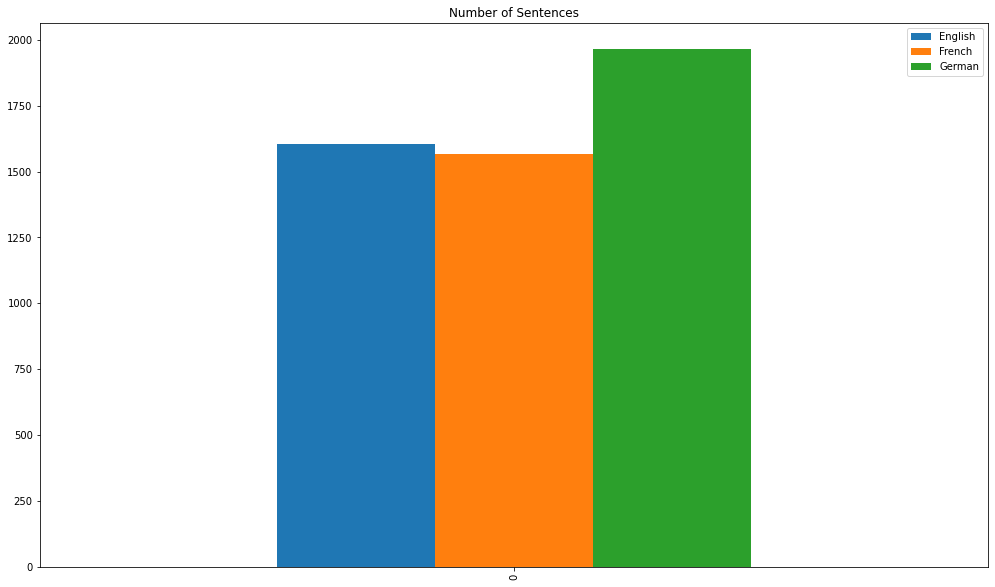

In [52]:
sentenceS.plot.bar()
plt.title('Number of Sentences')



Text(0.5, 1.0, 'Number of Words')

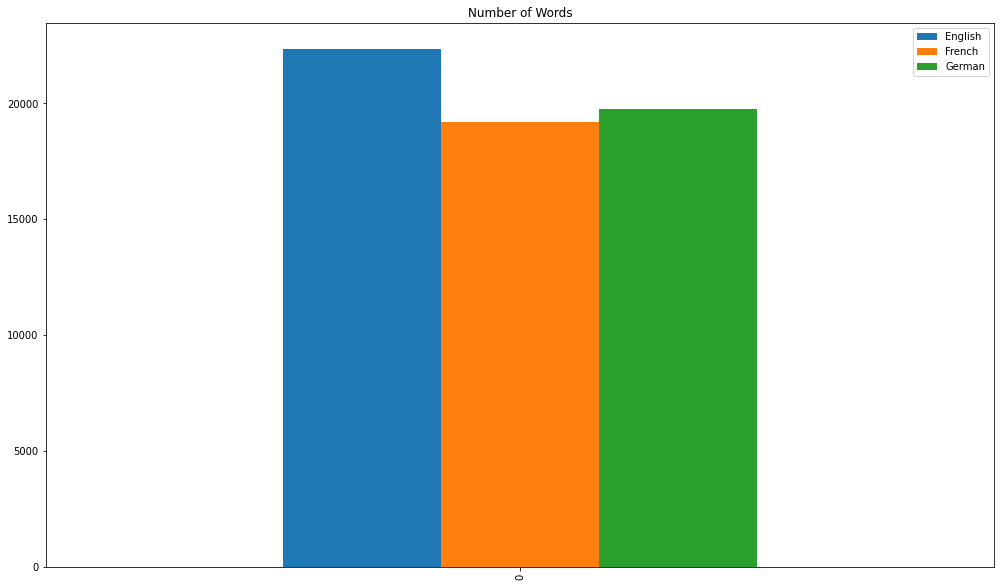

In [53]:
occurence_language.plot.bar()
plt.title('Number of Words')


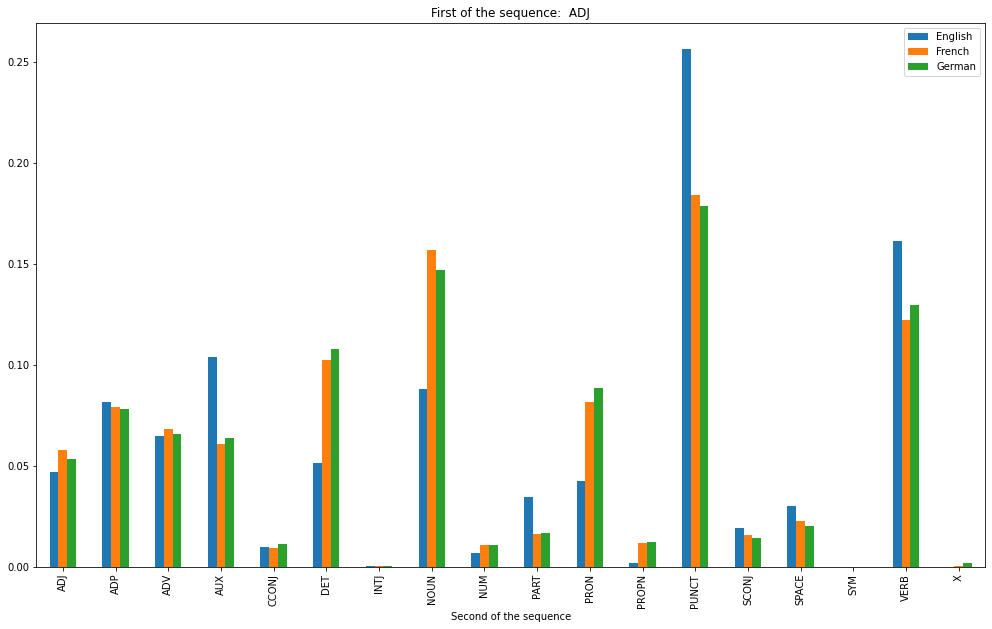

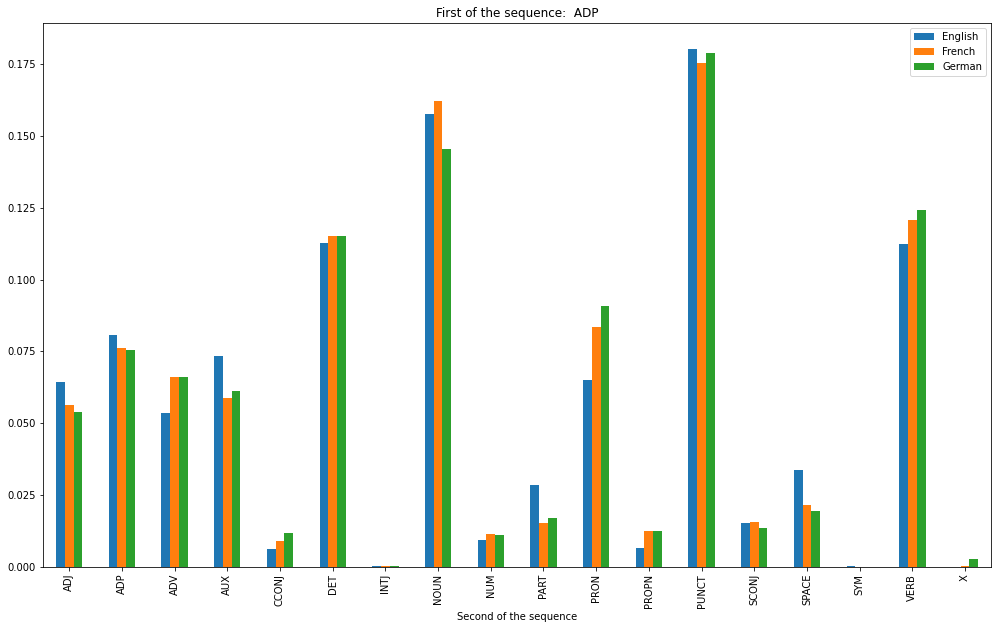

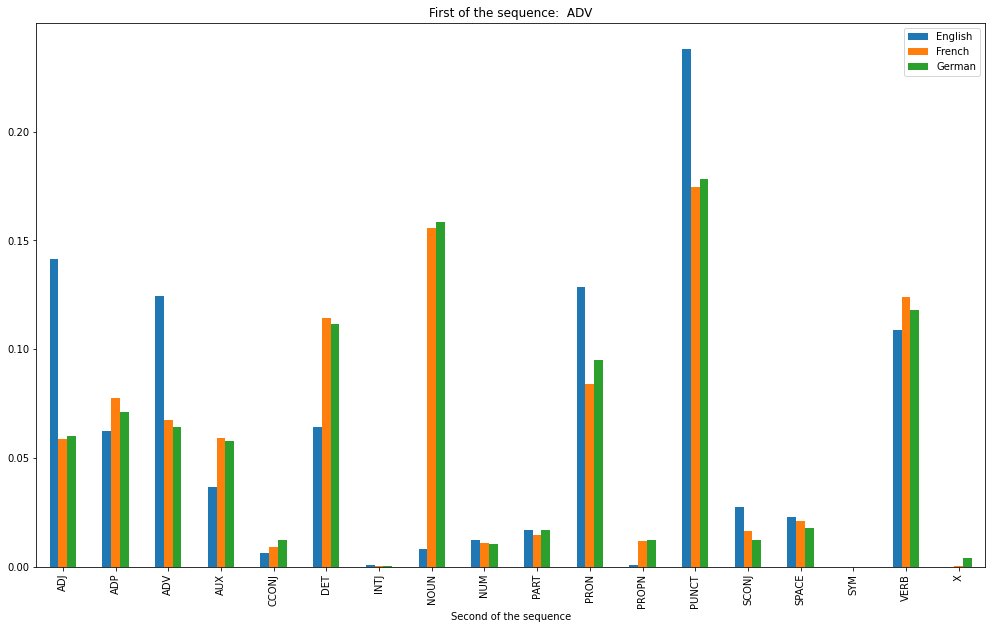

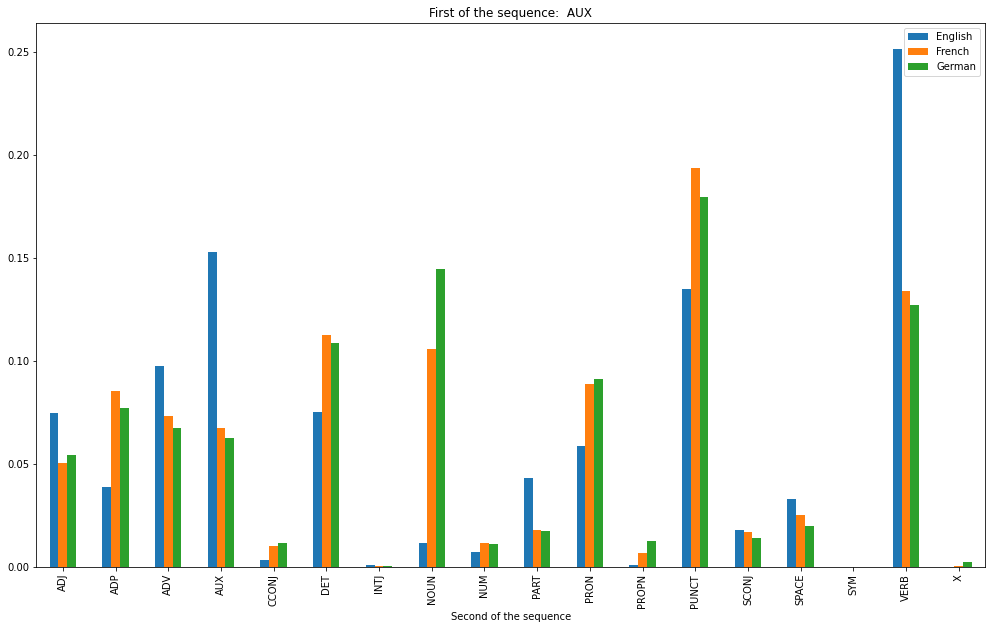

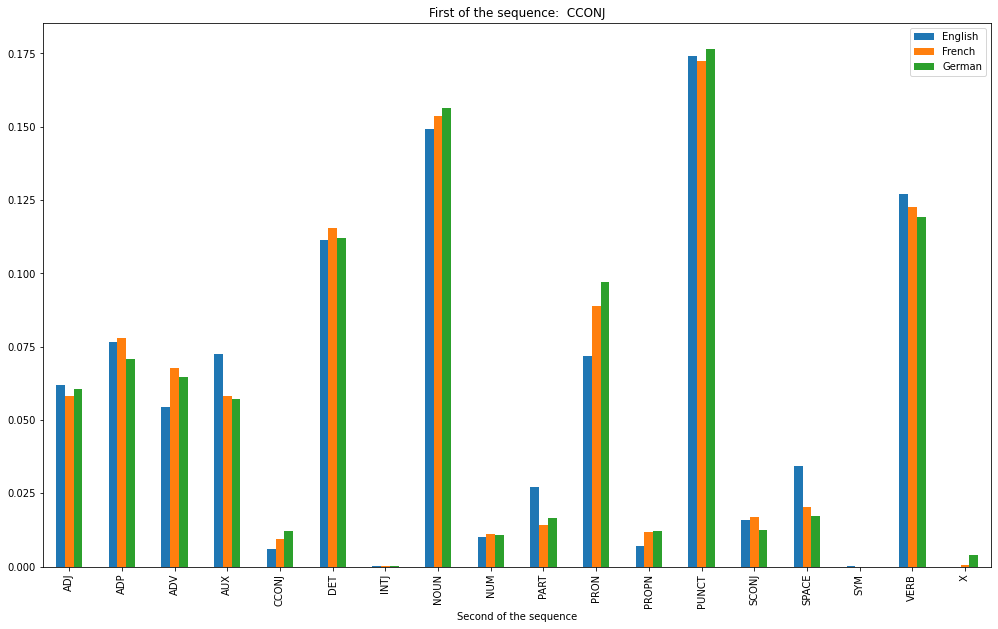

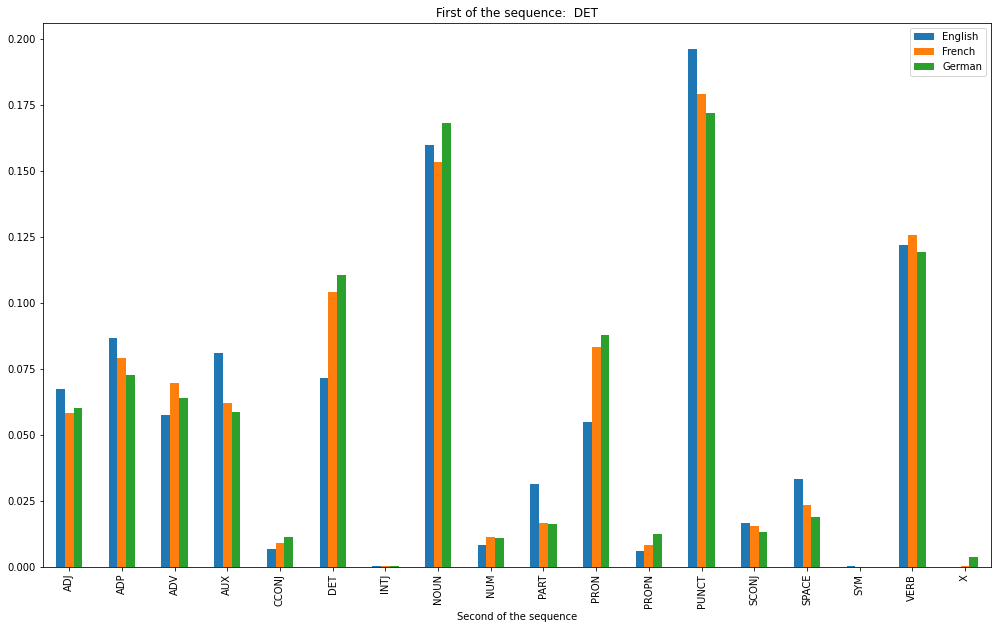

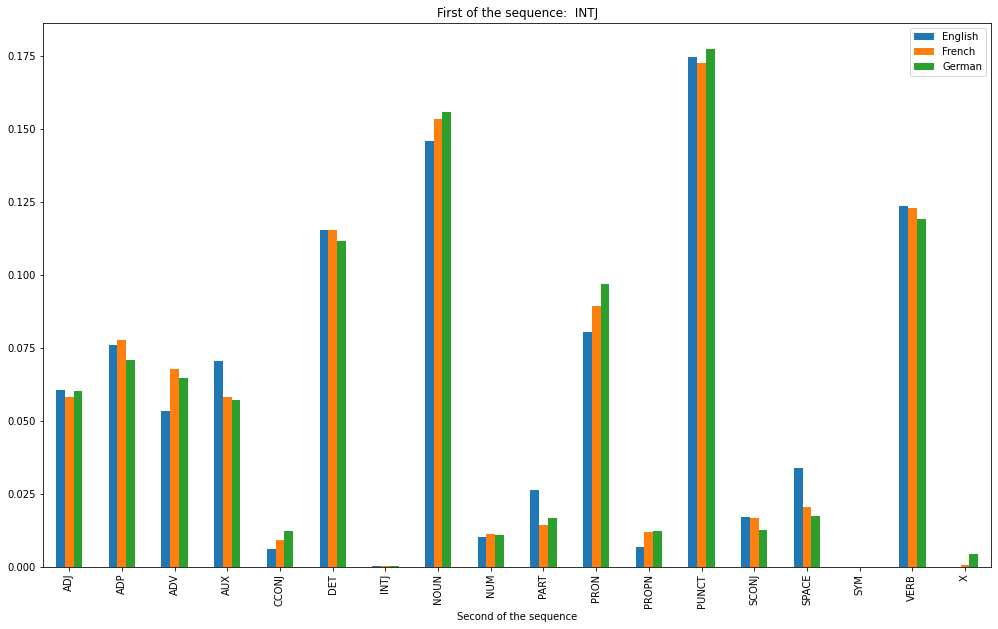

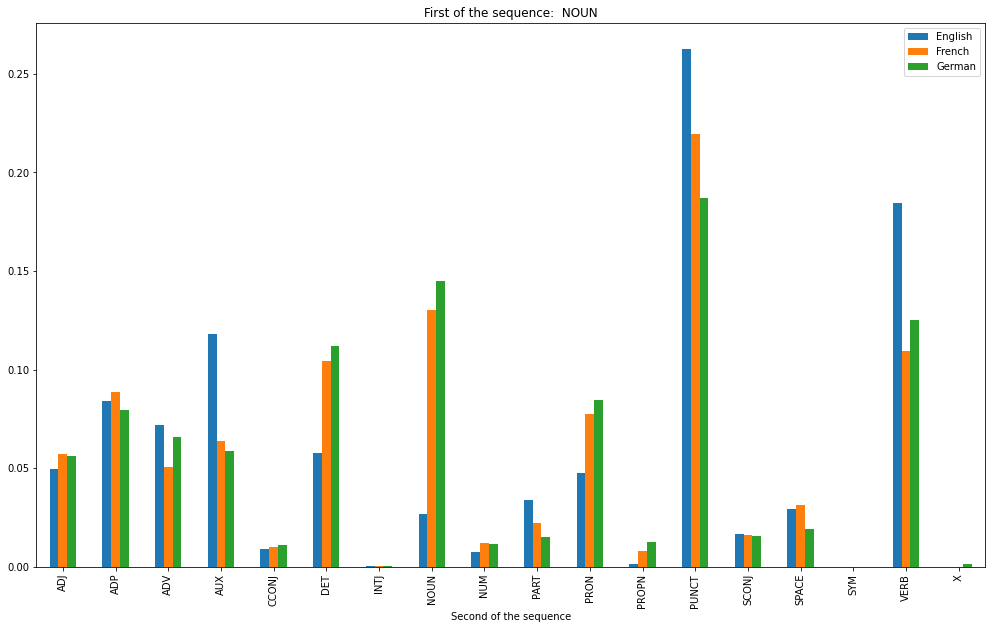

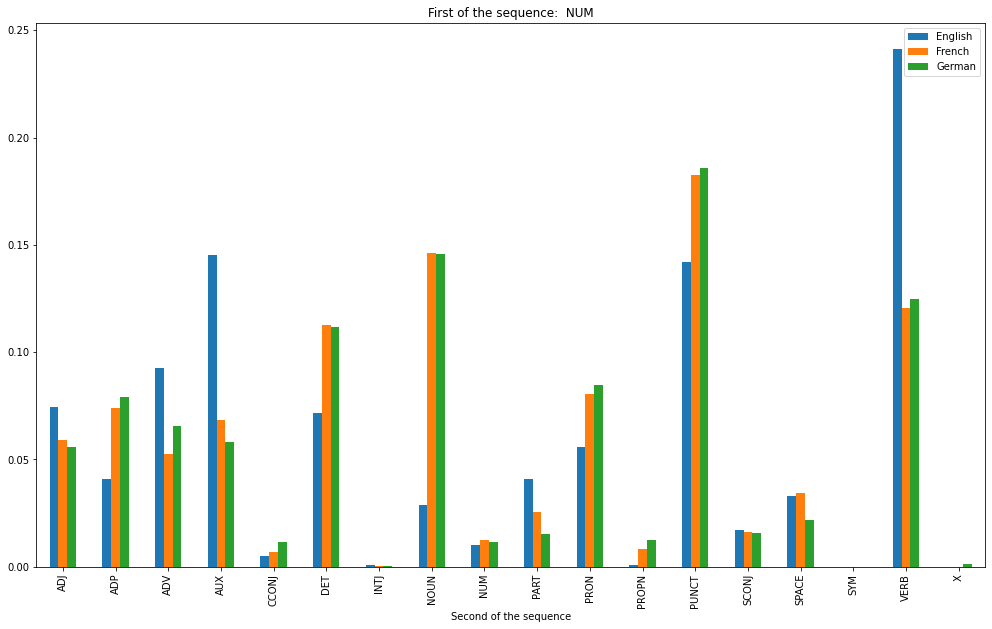

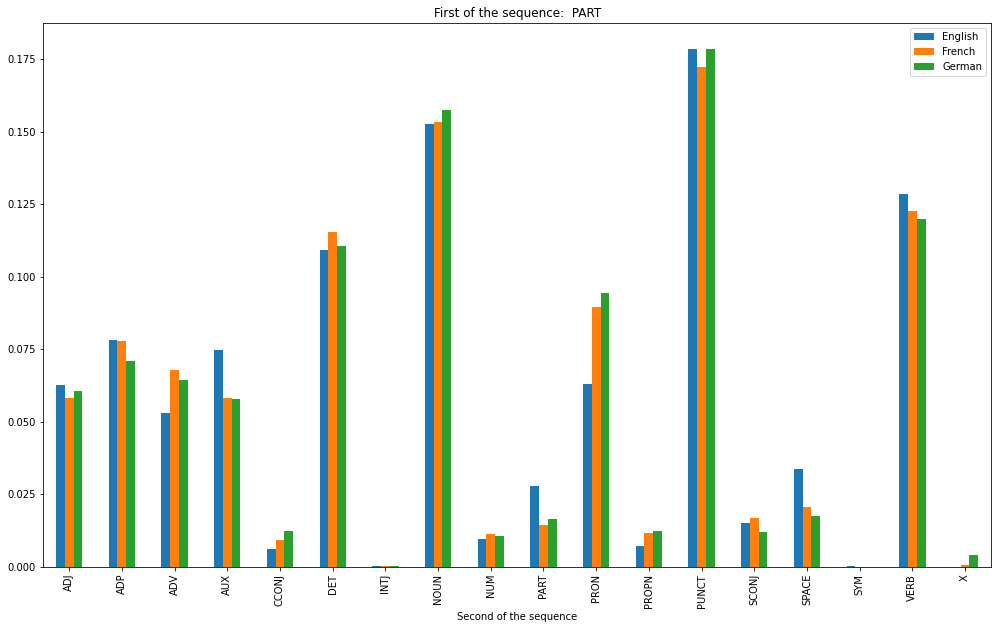

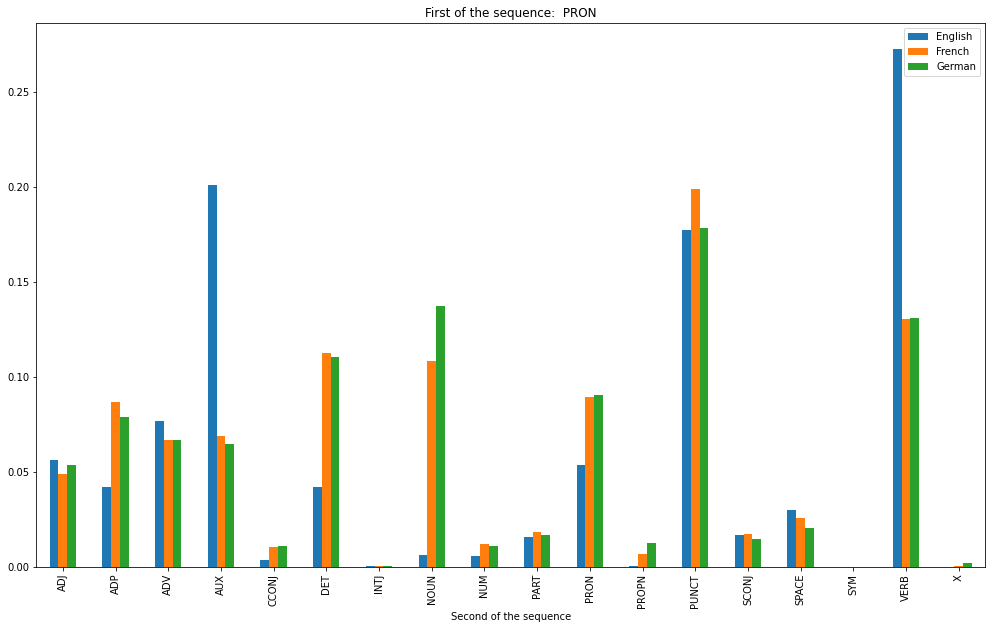

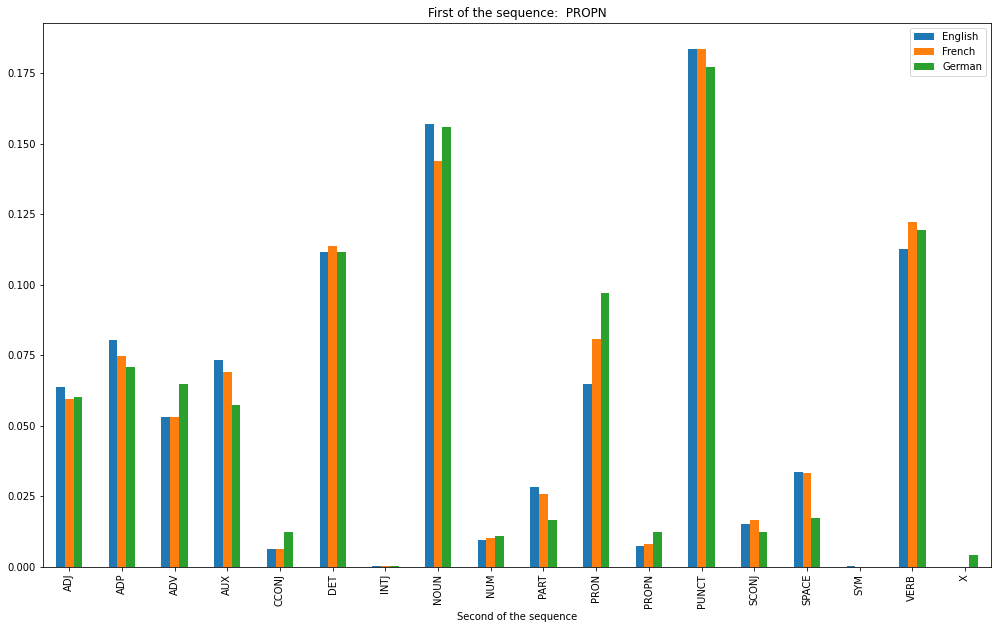

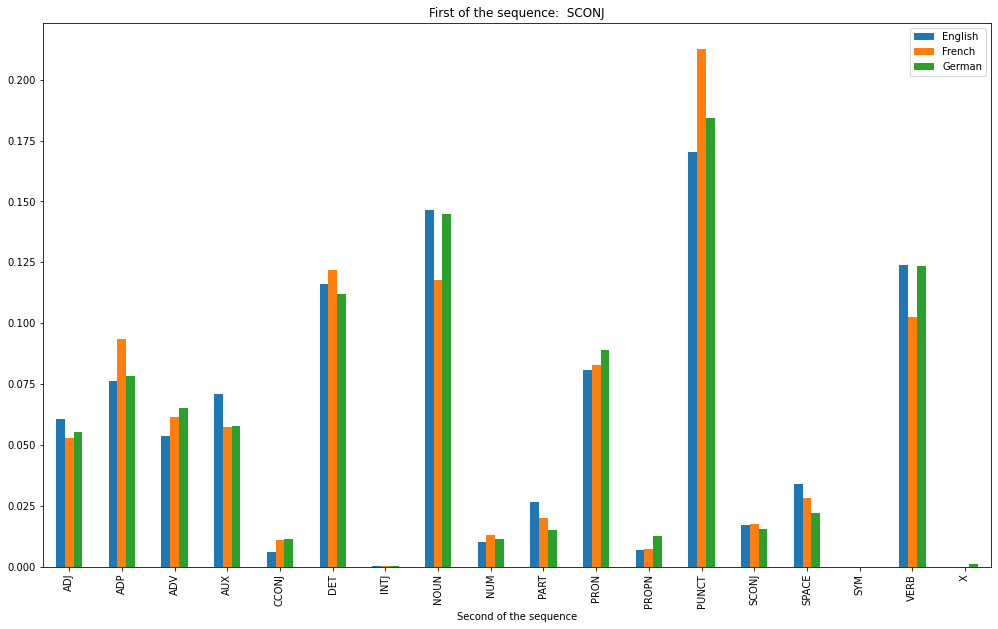

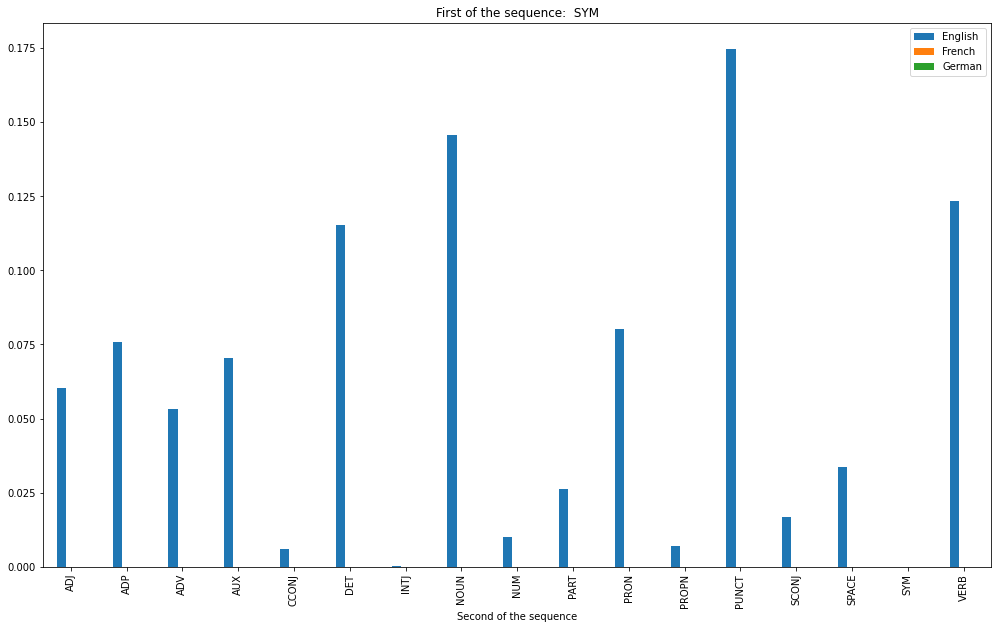

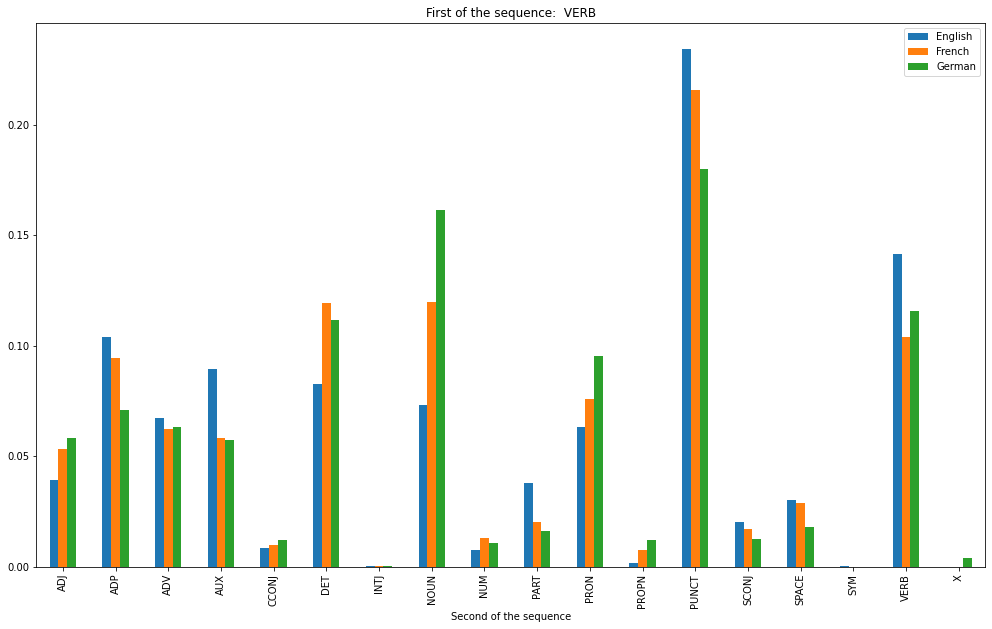

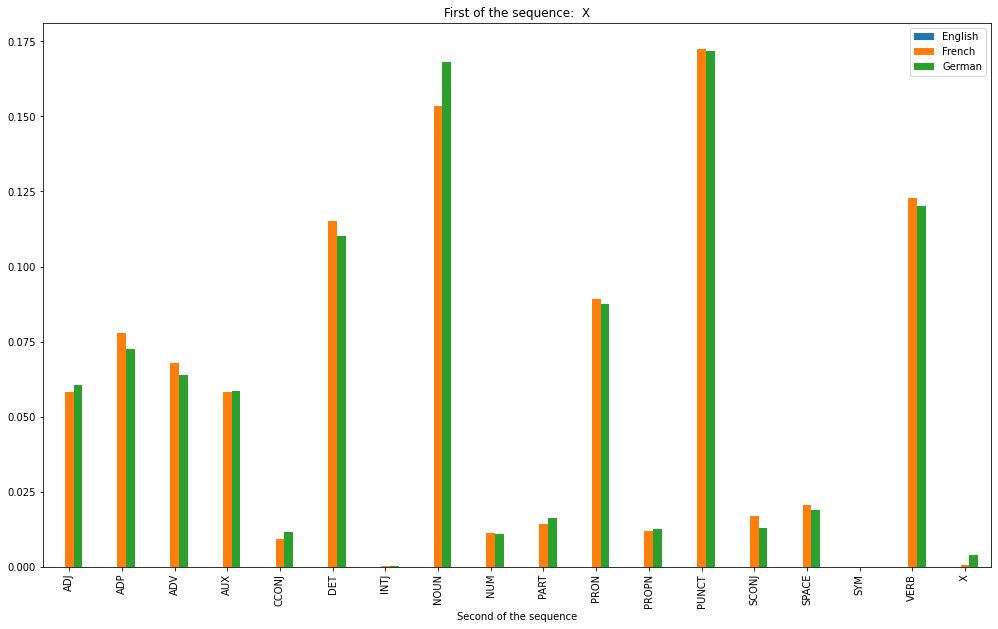

In [56]:
import matplotlib.pyplot as plt
for i in df_next_categorieS.reset_index()['level_0'].unique():
    (df_next_categorieS.xs(i,0,level=0)/df_next_categorieS.xs(i,0,level=0).sum()).plot.bar()
    plt.title('First of the sequence:  '+i)
    plt.xlabel('Second of the sequence')
    plt.show()